In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd '/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'
    print('google.colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas
google.colab


## California Housing prices
Se pretende estudiar los datos de un censo de California para construir un modelo que prediga los precios de viviendas del estado.
Estos datos incluyen métricas como la población, el ingreso medio y el precio medio de las viviendas para cada grupo de bloques en California. Los grupos de bloques son la unidad geográfica más pequeña para la cual la Oficina del Censo de los Estados Unidos publica datos (un grupo de bloques típicamente tiene una población de 600 a 3,000 personas). Podemos referirnos a ellos como "distritos" de manera abreviada. El modelo debe aprender de estos datos y ser capaz de predecir el precio medio de las viviendas en cualquier distrito, dado el resto de las métricas.

**¿Qué tipo de entrenamiento necesitamos para nuestro modelo? ¿Qué tarea se va a realizar?**

Esto es claramente una tarea típica de `aprendizaje supervisado`, ya que el modelo puede ser entrenado con datos etiquetados (cada instancia viene con la salida esperada, es decir, el precio medio de las viviendas del distrito). Es una tarea de _regresión_ típica, ya que el modelo predice un valor. Más específicamente, se trata de un problema de _regresión múltiple_, porque el sistema utilizará múltiples características para hacer una predicción (la población del distrito, el ingreso medio, etc.). También es un problema de _regresión univariada_, ya que solo tratamos de predecir un único valor para cada distrito. Si quisieramos predecir múltiples valores por distrito, sería un problema de _regresión multivariada_.

# Análisis exploratorio de datos

In [42]:
df_housing = pd.read_csv("./1_datos/data_housing.csv")
df_housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,3


**Para conocer los atributos existentes y el número de instancias pertenecientes a cada atributo**

In [43]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  income_cat          20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


Hay 20,640 instancias en el conjunto de datos. El atributo total_bedrooms solo tiene 20,433 valores no nulos, significa que faltan 207 distritos en este atributo.

Todos los atributos son numéricos, excepto `ocean_proximity`. Su tipo de dato es `object`, por lo que podría contener cualquier tipo de dato de Python. Pero al cargar los datos desde un archivo CSV, sabemos que debe ser texto.

Al observar las cinco primeras filas, notamos que los valores en la columna ocean_proximity son repetitivos, lo que sugiere que probablemente es un _atributo categórico_.

**Para conocer las categorias existentes y el número de instancias pertenecientes a cada categoría**

In [44]:
df_housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


**describe() muestra un resumen de los atributos numéricos**

In [45]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.006686
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.054618
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,3.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


- El atributo de `median_income` no está expresado en USD, los datos se han escalado y limitado a 15 para `median_income` altos, y a 0.5 para `median income` más bajos. Los números representan aproximadamente decenas de miles de dólares (por ejemplo, 3 en realidad significa alrededor de \$30,000).

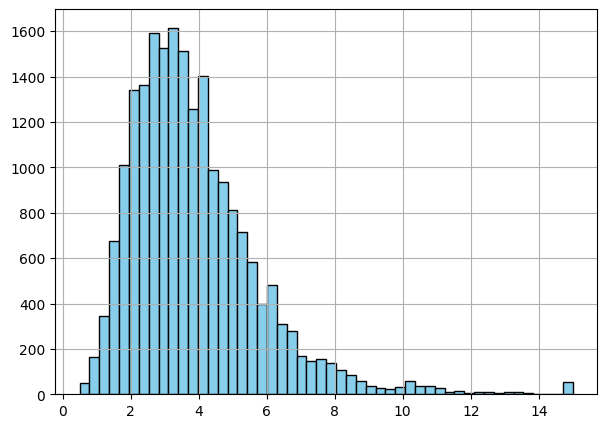

In [46]:
_ = df_housing["median_income"].hist(bins=50, color='skyblue', edgecolor='k', figsize=(7,5))

## Advertencia ⚠️

Antes de continuar observando los datos, vamos a separar un conjunto de prueba y no lo miramos más!!!

Si se observa el conjunto de prueba, es posible encontrar algun patrón interesante en los datos que nos lleve a seleccionar un tipo particular de modelo de aprendizaje maquinal. Al evaluar el modelo utilizando el conjunto de prueba, la estimación será demasiado optimista y el sistema no funcionará tan bien como se espera. A esto se llama sesgo de búsqueda de datos (data snooping bias).

## Dividimos los datos en entrenamiento y prueba

In [47]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_housing, test_size=0.2, stratify=df_housing["income_cat"], random_state=42)

In [48]:
# Antes de continuar hacemos una copia del conjunto de entrenamiento
housing = train_set.copy()

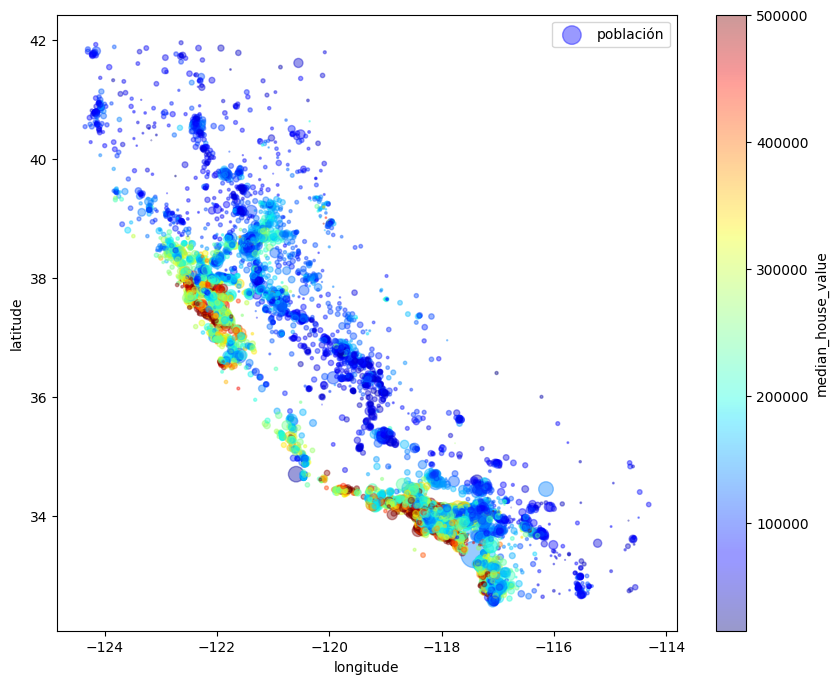

In [49]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha=0.4,
              s = housing["population"]/100 , label="población", c="median_house_value",
              cmap="jet", colorbar = True, legend = True, sharex = False, figsize=(10,8))
plt.show()

## Separamos los predictores de las etiquetas

In [50]:
housing_train = housing.drop("median_house_value", axis=1)
housing_train_labels = housing["median_house_value"].copy()

## Limpieza de Datos

La mayoría de los algoritmos de aprendizaje automático no pueden trabajar con características faltantes, vimos que el atributo `total_bedrooms` tiene algunos valores faltantes.

In [51]:
# índices de las filas con datos faltantes
null_rows_idx = housing_train.isnull().any(axis=1)
housing_train.loc[null_rows_idx]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,5
...,...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND,3
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN,3
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,<1H OCEAN,4
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,NEAR OCEAN,3


vamos a reemplazar los datos faltantes usando la mediana de la característica con datos faltantes, usaremos una clase de Scikit-Learn: `SimpleImputer`.

La ventaja que esto posee es que almacenará el valor de la mediana de cada característica. Esto permitirá imputar valores faltantes no solo en el conjunto de entrenamiento, sino también en el conjunto de pruebas y cualquier dato nuevo que ingrese al modelo.

La mediana solo puede calcularse en atributos numéricos, creamos una copia de los datos solo con atributos numéricos (excluyendo `ocean_proximity`)

In [52]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [53]:
housing_train_num = housing_train.drop("ocean_proximity", axis=1)
imputer.fit(housing_train_num)

SimpleImputer(strategy='median')

In [54]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])


Ahora se puede usar este imputador "entrenado" para transformar el conjunto de entrenamiento reemplazando los valores faltantes con las medianas calculadas:

In [55]:
X_train = imputer.transform(housing_train_num) # me devuelve un numpy array
type(X_train)

numpy.ndarray

In [56]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'income_cat'], dtype=object)

In [57]:
df_housing_train_num = pd.DataFrame(X_train, columns=housing_train_num.columns, index=housing_train_num.index)
df_housing_train_num.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,2.0
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,3.0
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,3.0
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,3.0
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,5.0


## Manejo de atributos categóricos

Nuestro conjunto de datos tiene el atributo `ocean_proximity` que es de tipo categórico. La mayoría de algoritmos de aprendizaje maquinal no trabaja con atributos categóricos, por lo que debemos convertir estas categorías de tipo texto a un valor numérico.

In [58]:
housing_train_cat = housing_train.loc[:,["ocean_proximity"]]
housing_train_cat.head(8)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN


Primero probaremos la clase `OrdinalEncoder` de Scikit-Learn

In [59]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_train_cat_encoded = ordinal_encoder.fit_transform(housing_train_cat)

In [60]:
housing_train_cat_encoded[:8]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.]])

Un problema con esta representación es que los algoritmos de aprendizaje maquinal asumirán que dos valores cercanos son más similares que dos valores distantes. Esto puede ser aceptable en algunos casos (por ejemplo, para categorías ordenadas como "malo", "regular", "bueno" y "excelente"), pero no es el caso para la columna ocean_proximity (por ejemplo, las categorías 0 y 4 son claramente más similares que las categorías 0 y 1).

Para solucionar este problema, una solución común es crear un atributo binario por categoría: un atributo igual a 1 cuando la categoría es `<1H OCEAN` (y 0 en caso contrario), otro atributo igual a 1 cuando la categoría es `INLAND` (y 0 en caso contrario), y así sucesivamente. Esto se llama codificación _one-hot_, porque solo un atributo será igual a 1 (activo), mientras que los demás serán 0 (inactivo). Los nuevos atributos a veces se llaman atributos ficticios (atributos _dummy_). Scikit-Learn proporciona la clase OneHotEncoder para convertir valores categóricos en vectores one-hot.

Clase `OneHotEncoder` de Scikit-Learn

In [61]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_train_cat_1hot = cat_encoder.fit_transform(housing_train_cat)
housing_train_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Por defecto, la salida de un `OneHotEncoder` es una matriz rala (sparse matrix), en lugar de un arreglo NumPy. Una matriz rala es una representación muy eficiente para matrices que contienen principalmente ceros. Internamente, solo almacena los valores no nulos y sus posiciones. Cuando un atributo categórico tiene cientos o miles de categorías, codificarlo con one-hot resulta en una matriz muy grande llena de 0s excepto por un solo 1 por fila. Una matriz rala ahorra mucha memoria y acelerará los cálculos.

Se puede usar una matriz rala de manera similar a un arreglo 2D normal, pero se puede convertir a un arreglo NumPy (denso) con el método `toarray()`. También puede fijarse `sparse=False` al crear el `OneHotEncoder`, en cuyo caso el método `transform()` devolverá directamente un arreglo NumPy.

In [62]:
housing_train_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Cuando entrenamos cualquier estimador de Scikit-Learn utilizando un DataFrame, el estimador guarda los nombres de las columnas en el atributo `feature_names_in_`. Luego, Scikit-Learn asegura que cualquier DataFrame proporcionado a este estimador después de de ser entrenado (por ejemplo, a transform() o predict()) tenga los mismos nombres de columnas. También proporcionan un método `get_feature_names_out()` que se puede usar para construir un DataFrame:

In [63]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [64]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [65]:
df_housing_train_cat_1hot = pd.DataFrame(housing_train_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out(), index=housing_train_cat.index)
df_housing_train_cat_1hot

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,1.0
20496,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
15174,1.0,0.0,0.0,0.0,0.0
12661,0.0,1.0,0.0,0.0,0.0
19263,1.0,0.0,0.0,0.0,0.0
19140,1.0,0.0,0.0,0.0,0.0


## Transformación y escalado de características

Una de las transformaciones más importantes es el _escalado de características_ (feature scaling). Con pocas excepciones, los algoritmos de aprendizaje maquinal no resultan en un buen desempeño cuando los atributos numéricos de entrada tienen escalas muy diferentes. En nuestro caso: el número total de habitaciones varía entre 6 a 39,320, los ingresos solo varían desde 0 hasta 15. Sin escalar previamente los datos, el atributo `total_rooms` tendrá una influencia dominante en el modelo de aprendizaje automático ignorando el atributo `median_income`.

Existen dos formas: el escalado _min-max_ y la _estandarización_.

### Escalado min-max

Se lo llama comunmente normalización. Para cada atributo, los valores se escalan en el rango entre 0 a 1. Esto se logra restando el valor mínimo y dividiendo por la diferencia entre el mínimo y el máximo.
Scikit-Learn tiene un _transformer_ llamado `MinMaxScaler` para esto.

### Estandarización

Primero se resta el valor medio (los valores estandarizados tienen media de cero), luego divide el resultado por el desvío estándar (los valores tienen un desvío estándar igual a 1).
Scikit-Learn proporciona un _transformer_ llamado `StandardScaler`:

In [71]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_train_num_std = std_scaler.fit_transform(df_housing_train_num)

In [72]:
housing_train_num_std

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.55628602,
        -0.8936472 , -0.95468705],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.72131799,
         1.292168  ,  1.89007821],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.52440722,
        -0.52543365, -0.95468705],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86511838,
        -0.36547546, -0.00643196],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.01061579,
         0.16826095, -0.00643196],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.79857323,
        -0.390569  , -0.00643196]])

In [73]:
df_housing_train_num_std = pd.DataFrame(housing_train_num_std, columns=housing_train_num.columns, index=housing_train_num.index)
df_housing_train_num_std

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.954687
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,1.890078
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.954687
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.954687
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,-0.006432
...,...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,0.941823
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,-0.954687
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,-0.006432
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,-0.006432


In [74]:
df_train = pd.concat([df_housing_train_num_std, df_housing_train_cat_1hot], axis=1)
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.954687,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,1.890078,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.954687,0.0,1.0,0.0,0.0,0.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.954687,0.0,0.0,0.0,0.0,1.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,-0.006432,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,0.941823,1.0,0.0,0.0,0.0,0.0
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,-0.954687,0.0,1.0,0.0,0.0,0.0
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,-0.006432,1.0,0.0,0.0,0.0,0.0
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,-0.006432,1.0,0.0,0.0,0.0,0.0


In [75]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_train, housing_train_labels)

LinearRegression()

In [77]:
X_prueba = df_train[:5]
X_prueba

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.954687,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,1.890078,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.954687,0.0,1.0,0.0,0.0,0.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.954687,0.0,0.0,0.0,0.0,1.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,-0.006432,1.0,0.0,0.0,0.0,0.0


In [78]:
lin_reg.predict(X_prueba)

array([ 87710.9184376 , 312666.78080576, 148193.92872405, 181973.84391033,
       242269.47566914])

In [79]:
housing_train_labels[:5]

,median_house_value
12655,72100.0
15502,279600.0
2908,82700.0
14053,112500.0
20496,238300.0


## Debemos repetir el mismo procesamiento con los datos de prueba

In [80]:
housing_test = test_set.copy()
housing_test_labels = housing_test["median_house_value"].copy()

In [81]:
housing_test_num = housing_test.drop(["ocean_proximity", "median_house_value"], axis=1)
housing_test_cat = housing_test.loc[:,["ocean_proximity"]]
housing_test_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,3
...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,4


In [83]:
#completar datos faltantes
X_test = imputer.transform(housing_test_num) # me devuelve un numpy array
df_housing_test_num = pd.DataFrame(X_test, columns=housing_test_num.columns, index=housing_test_num.index)

In [84]:
#escalamos los datos
housing_test_num_std = std_scaler.transform(df_housing_test_num)
housing_test_cat_1hot = cat_encoder.transform(housing_test_cat)

housing_test_num_std

array([[ 0.59229422, -0.71065803,  0.02756357, ...,  1.23238474,
         2.31286606,  1.89007821],
       [-0.42180959, -0.35049119, -0.37006852, ..., -0.56965792,
         0.59532358,  0.94182312],
       [ 0.56232071, -0.64985064,  0.5842485 , ..., -0.59095237,
         0.26669272, -0.00643196],
       ...,
       [-0.07211862, -0.56097831,  1.14093342, ..., -0.37002247,
         0.43263556,  0.94182312],
       [ 0.83208232, -0.93985512,  0.10708999, ..., -0.22628494,
         0.54419156,  0.94182312],
       [ 0.50736927, -0.67791559,  0.5842485 , ..., -0.18901966,
         0.12348106, -0.00643196]])

In [85]:
df_test_num_std = pd.DataFrame(housing_test_num_std, columns=housing_test_num.columns, index=housing_test_num.index)
df_test_num_std

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
5241,0.592294,-0.710658,0.027564,1.788508,1.163748,0.685096,1.232385,2.312866,1.890078
17352,-0.421810,-0.350491,-0.370069,-0.281778,-0.552441,-0.506160,-0.569658,0.595324,0.941823
3505,0.562321,-0.649851,0.584248,-0.546935,-0.642511,-0.548289,-0.590952,0.266693,-0.006432
7777,0.737166,-0.808885,0.504722,-0.453405,-0.508624,-0.311651,-0.521745,-0.317651,-0.006432
14155,1.251711,-1.342119,0.743301,0.540818,0.194892,0.067507,0.311400,0.250419,-0.006432
...,...,...,...,...,...,...,...,...,...
12182,1.141809,-0.897758,-0.767701,-0.175153,-0.260324,-0.190643,-0.343404,-0.555882,-0.954687
7275,0.667228,-0.771465,0.345669,-0.812560,-0.584087,-0.134173,-0.572320,-0.899999,-0.954687
17223,-0.072119,-0.560978,1.140933,-0.393546,-0.467240,-0.678261,-0.370022,0.432636,0.941823
10786,0.832082,-0.939855,0.107090,-0.257927,-0.296839,-0.303584,-0.226285,0.544192,0.941823


In [86]:
df_test_cat = pd.DataFrame(housing_test_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out(), index=housing_test_cat.index)
df_test_cat

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5241,1.0,0.0,0.0,0.0,0.0
17352,1.0,0.0,0.0,0.0,0.0
3505,1.0,0.0,0.0,0.0,0.0
7777,1.0,0.0,0.0,0.0,0.0
14155,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
12182,1.0,0.0,0.0,0.0,0.0
7275,1.0,0.0,0.0,0.0,0.0
17223,1.0,0.0,0.0,0.0,0.0
10786,1.0,0.0,0.0,0.0,0.0


In [87]:
df_test = pd.concat([df_test_num_std, df_test_cat], axis=1)
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5241,0.592294,-0.710658,0.027564,1.788508,1.163748,0.685096,1.232385,2.312866,1.890078,1.0,0.0,0.0,0.0,0.0
17352,-0.421810,-0.350491,-0.370069,-0.281778,-0.552441,-0.506160,-0.569658,0.595324,0.941823,1.0,0.0,0.0,0.0,0.0
3505,0.562321,-0.649851,0.584248,-0.546935,-0.642511,-0.548289,-0.590952,0.266693,-0.006432,1.0,0.0,0.0,0.0,0.0
7777,0.737166,-0.808885,0.504722,-0.453405,-0.508624,-0.311651,-0.521745,-0.317651,-0.006432,1.0,0.0,0.0,0.0,0.0
14155,1.251711,-1.342119,0.743301,0.540818,0.194892,0.067507,0.311400,0.250419,-0.006432,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12182,1.141809,-0.897758,-0.767701,-0.175153,-0.260324,-0.190643,-0.343404,-0.555882,-0.954687,1.0,0.0,0.0,0.0,0.0
7275,0.667228,-0.771465,0.345669,-0.812560,-0.584087,-0.134173,-0.572320,-0.899999,-0.954687,1.0,0.0,0.0,0.0,0.0
17223,-0.072119,-0.560978,1.140933,-0.393546,-0.467240,-0.678261,-0.370022,0.432636,0.941823,1.0,0.0,0.0,0.0,0.0
10786,0.832082,-0.939855,0.107090,-0.257927,-0.296839,-0.303584,-0.226285,0.544192,0.941823,1.0,0.0,0.0,0.0,0.0


## Evaluación con los datos de prueba

In [88]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(df_test)
lin_mse = mean_squared_error(housing_test_labels, housing_predictions, squared=False)
lin_mse

67238.68522644627

El valor de `median_house_value` de los distritos oscila entre \$120,000 y \$265,000, por lo que un error de predicción de \$71,834 no es muy bueno. Este es un ejemplo de un modelo mal ajustado (`underfitting`) a los datos de entrenamiento. Cuando esto ocurre, puede significar que las características no proporcionan suficiente información para realizar buenas predicciones o que el modelo no es lo suficientemente bueno.